In [10]:
from domino.data_sources import DataSourceClient

# instantiate a client and fetch the datasource instance
s3_dev = DataSourceClient().get_datasource("domino-winequality-workshop")

# list objects available in the datasource
objects = s3_dev.list_objects()

## get content as binary
# content = s3_dev.get("key")

## download content to file
# s3_dev.download_file("key", "./path/to/local/file")

## Download content to file object
# f = io.BytesIO()
# s3_dev.download_fileobj("key", f)

In [11]:
from io import StringIO
import pandas as pd

s=str(objects[0].get(),'utf-8')
data = StringIO(s) 

df=pd.read_csv(data)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,5.58
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,5.04
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,5.34
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,4.92
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,5.16


<AxesSubplot:>

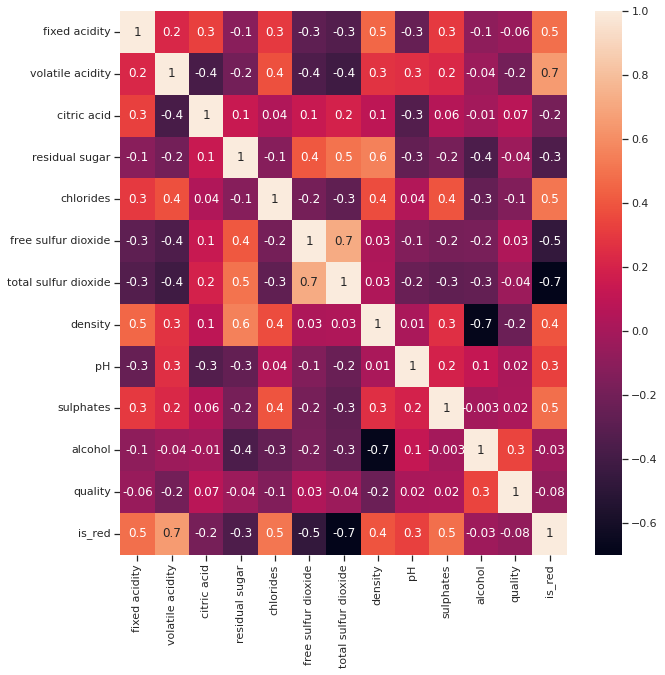

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
df['is_red'] = df.type.apply(lambda x : int(x=='red'))
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

density            -0.234881
volatile acidity   -0.199486
chlorides          -0.148369
is_red             -0.080618
alcohol             0.341581
Name: quality, dtype: float64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Feature Importance for Wine Quality'}, ylabel='Pearson Correlation'>

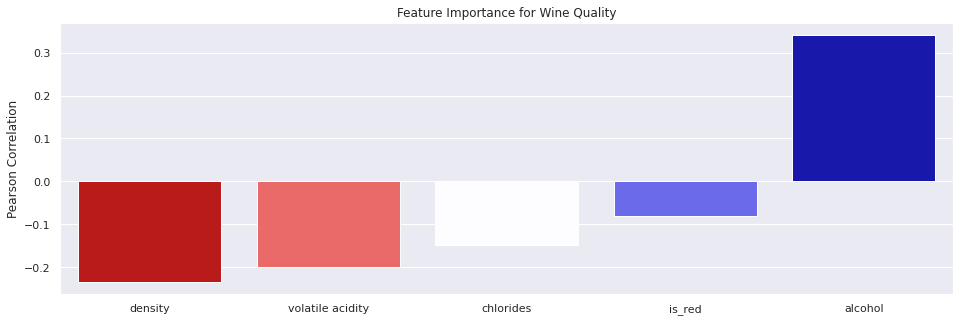

In [14]:
corr_values = df.corr().sort_values(by = 'quality')['quality'].drop('quality',axis=0)
important_feats=corr_values[abs(corr_values)>0.08]
print(important_feats)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,5))
plt.title('Feature Importance for Wine Quality')
plt.ylabel('Pearson Correlation')
sns.barplot(important_feats.keys(), important_feats.values, palette='seismic_r')

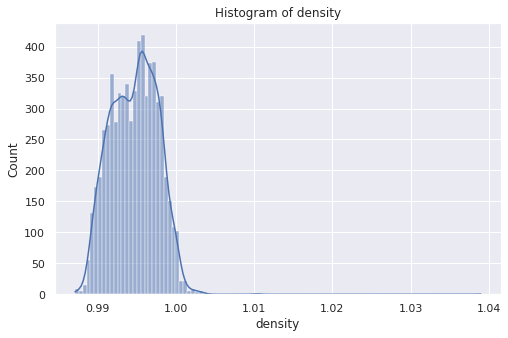

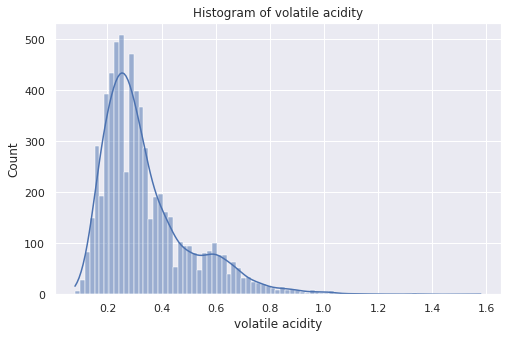

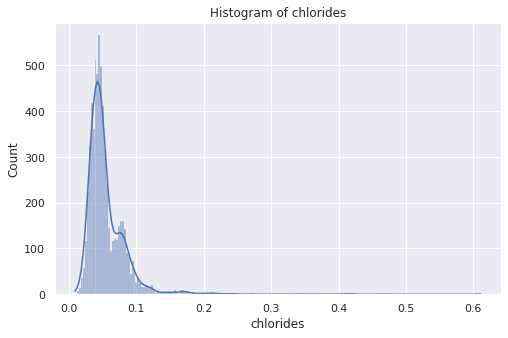

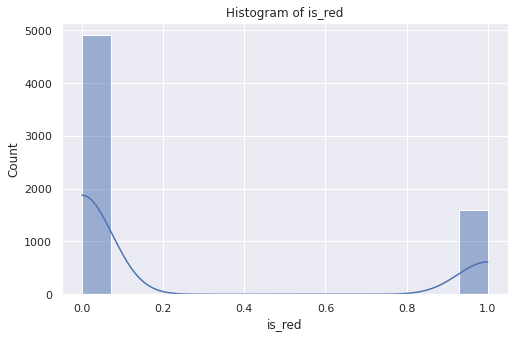

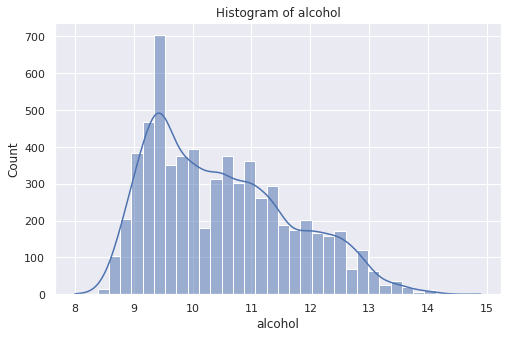

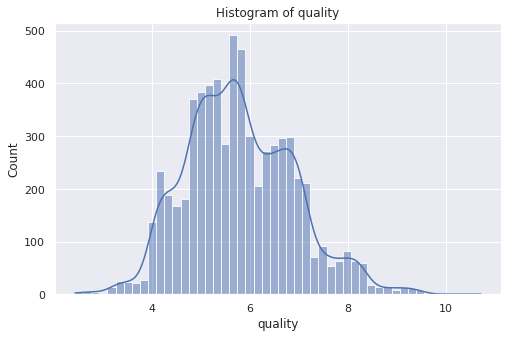

In [15]:
for i in list(important_feats.keys())+['quality']:
    plt.figure(figsize=(8,5))
    plt.title('Histogram of {}'.format(i))
    sns.histplot(df[i], kde=True)

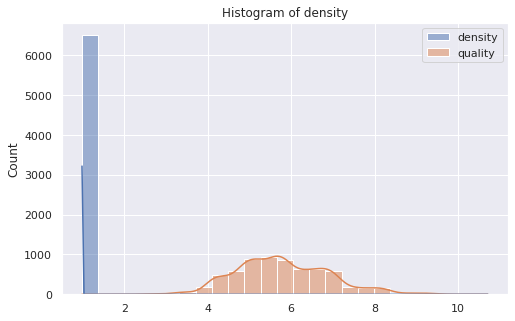

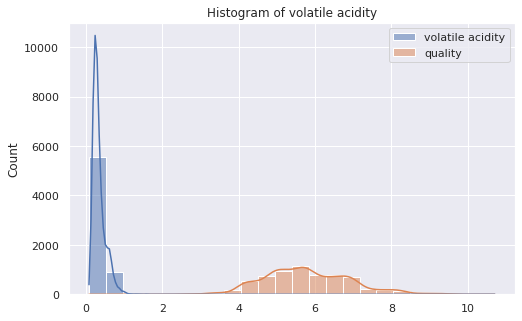

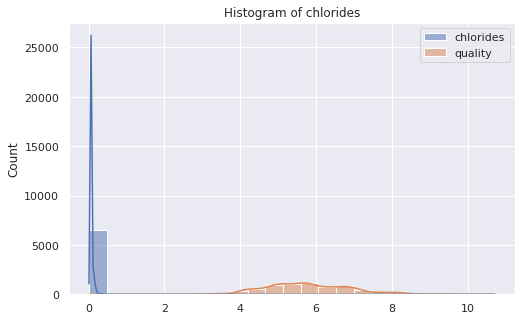

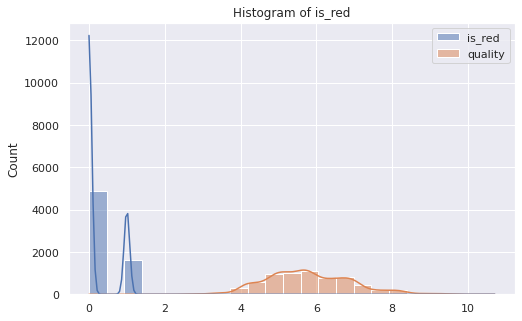

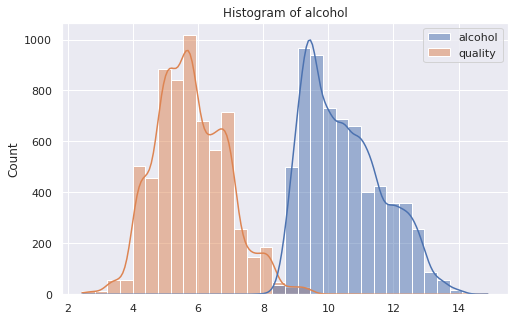

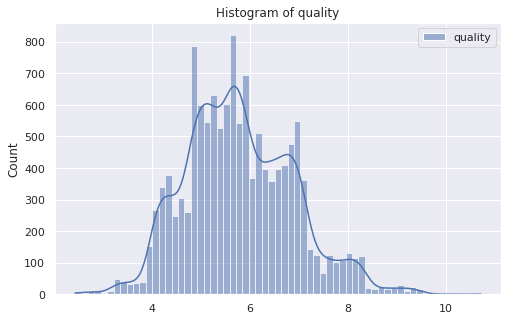

In [17]:
for i in list(important_feats.keys())+['quality']:
    plt.figure(figsize=(8,5))
    plt.title('Histogram of {}'.format(i))
    sns.histplot(df[[i,'quality']], kde=True)

In [6]:
scaled_df = df[list(important_feats.keys())]

In [28]:
scaled_df =df[list(important_feats.keys())+['quality']]
scaled_df = scaled_df.apply(lambda x: (x-min(x))/(max(x)-min(x)))
# sns.histplot(scaled_df, bins =8, multiple = 'dodge')

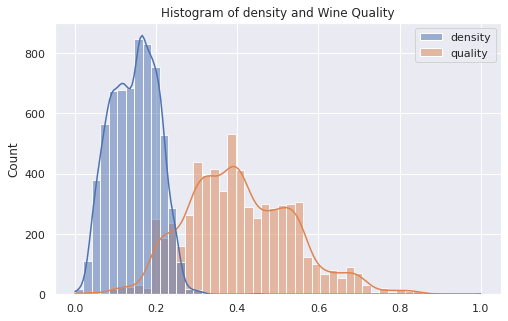

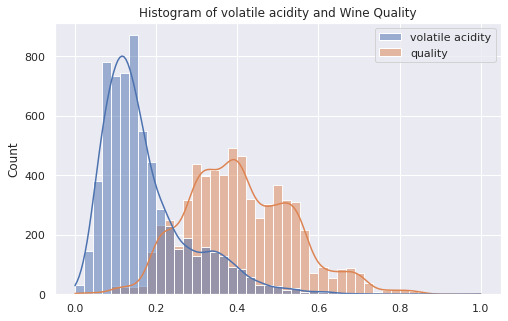

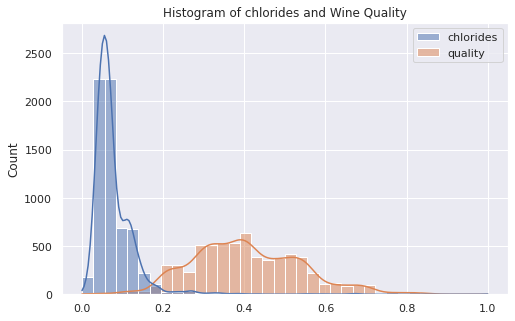

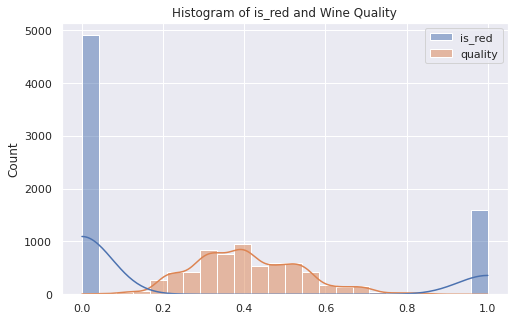

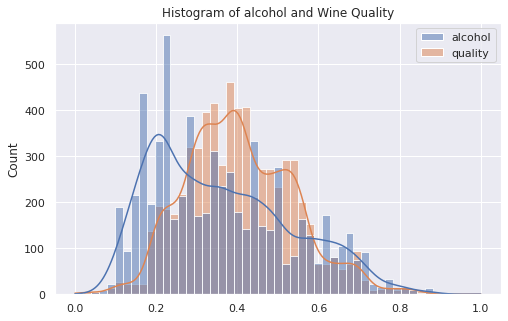

In [27]:
for i in list(important_feats.keys()):
    plt.figure(figsize=(8,5))
    plt.title('Histogram of {} and Wine Quality'.format(i))
    sns.histplot(scaled_df[[i,'quality']], kde=True)

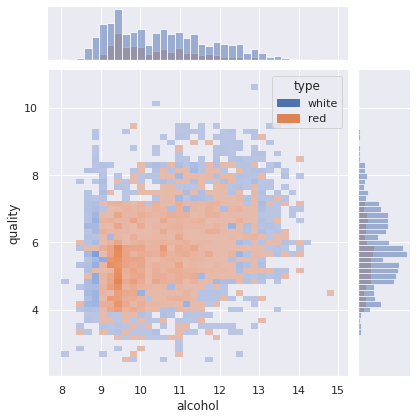

In [29]:
sns.jointplot(kind = 'hist', x=df.alcohol, y = df.quality, hue = df.type)

In [34]:
import os
path = str('/domino/datasets/local/{}/WineQualityData.csv'.format(os.environ.get('DOMINO_PROJECT_NAME')))
df.to_csv(path, index = False)

/domino/datasets/local/WineQuality/WineQualityData.csv


<Figure size 1440x360 with 0 Axes>

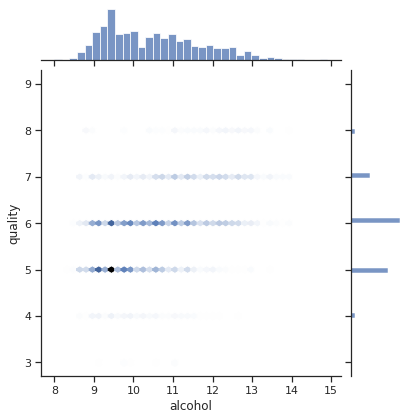

In [8]:
plt.figure(figsize=(20,5))
sns.set_theme(style="ticks")
sns.jointplot(x=df.alcohol, y = df.quality, kind = "hex")
# sns.jointplot(x=df.alcohol, y = df.quality, hue =df.type, style = df.type, size= df.alcohol, sizes=(20,200))

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

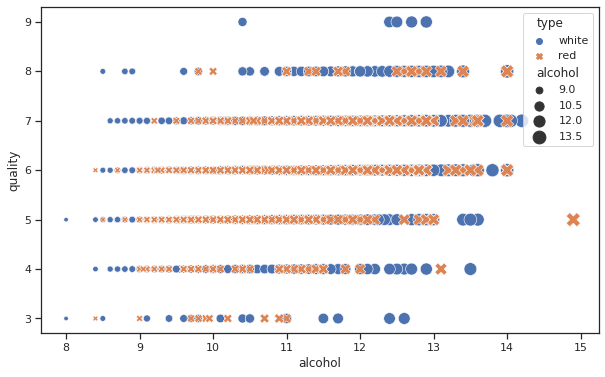

In [9]:
fig, ax1 = plt.subplots(figsize=(10,6))
sns.scatterplot(x=df.alcohol, y = df.quality, hue =df.type, style = df.type, size= df.alcohol, sizes=(20,200))